In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def func1(x):
    return -np.sqrt((np.cos(x)**2)) + x

def func2(x):
    return -((x - 2) ** 2 + 1)

def func3(x):
    return x**3

def func4(x):
    return np.sin(x)**2

def func5(x):
    return x**2 + np.sin(2*x)

def func5_chord(x):
    return 2*x + 2*np.cos(2*x)

# Метод ломаных

[np.float64(0.035278217598636835), np.float64(0.9716498321897729)] [np.float64(0.07174246160558599), np.float64(-7.344639629093481)]
[np.float64(0.9716498321897729), np.float64(1.553705750110458)] [np.float64(1.8755225761379786), np.float64(-2.734558526477752)]
[np.float64(-0.9010933969924992), np.float64(-0.44762423022166586)] [np.float64(-0.16137914849481416), np.float64(-3.7530093887941485)]
Наименьшая точка пересечения: (np.float64(-0.5181644986863614), np.float64(-0.6157332474021536), np.float64(0.023687610563480344), np.float64(-0.5211649789396762), np.float64(-0.5151773281717098))


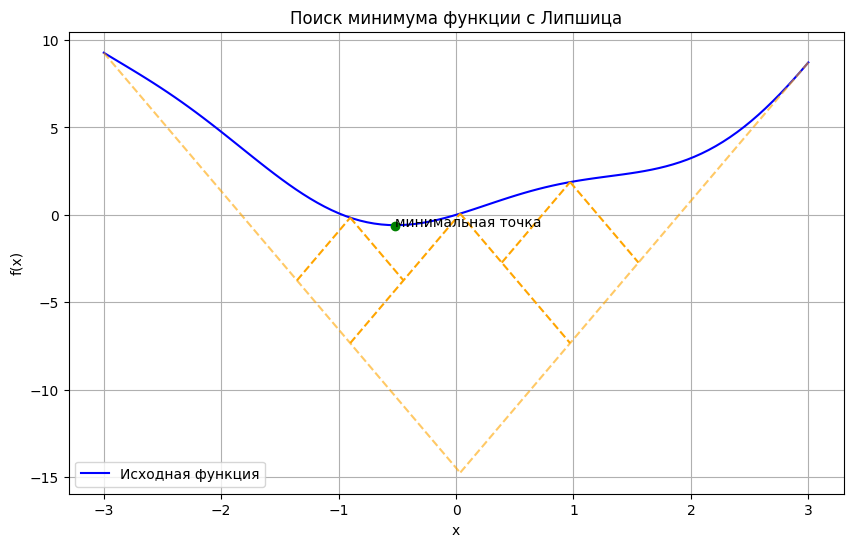

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def general_function(x):
    return -np.sin(x)  # Пример функции с L < 5

def derivative(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)  # Численное вычисление производной

def find_lipschitz_constant(f, a, b, n=100):
    x_values = np.linspace(a, b, n)
    derivatives = np.array([derivative(f, x) for x in x_values])
    L = np.max(np.abs(derivatives))  # Константа Липшица
    return L

def find_intersection(x1, y1, m1, x2, y2, m2):
    if m1 == m2:
        raise ValueError("Линии параллельны и не пересекаются.")

    intersection_x = (y2 - y1 + m1 * x1 - m2 * x2) / (m1 - m2)
    intersection_y = m1 * (intersection_x - x1) + y1
    return intersection_x, intersection_y

def find_minimum(f, a, b, epsilon, n, max_iterations=1000):
    L = find_lipschitz_constant(f, a, b)
    intersections = []  # Список для хранения точек пересечения и расстояний

    plt.figure(figsize=(10, 6))
    x_values = np.linspace(a, b, n)
    y_values = f(x_values)
    plt.plot(x_values, y_values, label='Исходная функция', color='blue')

    # Проводим линии Липшица
    left = a
    right = b
    f_left = f(left)
    f_right = f(right)

    # Инициализация линий
    left_line_y = f_left - L * (x_values - left)  # Линия с наклоном -L
    right_line_y = f_right + L * (x_values - right)  # Линия с наклоном +L

    # Нахождение точки пересечения линий
    inter_x, inter_y = find_intersection(left, f_left, -L, right, f_right, L)
    inter_x_for_plt = inter_x
    inter_y_for_plt = inter_y
    # Сохраняем первую точку пересечения и расстояние
    distance = f(inter_x) - inter_y 
    intersections.append((inter_x, inter_y, distance, left, right))

    # Основной цикл
    for iters in range(max_iterations):
        intersections = sorted(intersections, key=lambda x: x[2], reverse=True)
        curr_point = intersections.pop(0)

        if curr_point[2] < epsilon:
            break

        x_point = curr_point[0]
        y_point = f(curr_point[0])

        iter_x1, iter_y1 = find_intersection(curr_point[3], f(curr_point[3]), -L, x_point, y_point, L)
        iter_x2, iter_y2 = find_intersection(x_point, y_point, -L, curr_point[4], f(curr_point[4]), L)
        intersections.append((iter_x1, iter_y1, f(iter_x1) - iter_y1, curr_point[3], x_point))
        intersections.append((iter_x2, iter_y2, f(iter_x2) - iter_y2, x_point, curr_point[4]))

        if iters >= 0 and iters < 3:
            point1_1 = (iter_x1, iter_y1)
            point1_2 = (x_point, y_point)

            point2_1 = (x_point, y_point)
            point2_2 = (iter_x2, iter_y2)

            x1_values = [point1_1[0], point1_2[0]]
            y1_value = [point1_1[1], point1_2[1]]

            x2_values = [point2_1[0], point2_2[0]]
            y2_value = [point2_1[1], point2_2[1]]
            print(x2_values, y2_value)
            
            plt.plot(x1_values, y1_value, linestyle= '--', color='orange')
            plt.plot(x2_values, y2_value, linestyle= '--', color='orange')

    # Получаем наименьшее значение по ординате из массива
    min_intersection = min(intersections, key=lambda x: x[1])

    # Визуализация линий Липшица
    #print(min(len(intersections), len(intersections), intersections))
    for i in range(min(len(intersections), 1)):
        inter_x, inter_y, distance, _, _ = intersections[i]
        #plt.plot(inter_x, f(inter_x), 'ro')  # Точка пересечения
        #plt.text(inter_x, f(inter_x), f'point {i+1}', fontsize=8, verticalalignment='bottom', color='black', )

        # Рисуем линии Липшица под графиком функции
        plt.plot([a, inter_x_for_plt], [f(a), inter_y_for_plt], color='orange', linestyle='--', alpha=0.6)
        plt.plot([b, inter_x_for_plt], [f(b), inter_y_for_plt], color='orange', linestyle='--', alpha=0.6)

    plt.title('Поиск минимума функции с Липшица')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid()
    plt.legend()

    return min_intersection

# Задаем интервал и количество точек
a = -3
b = 3
n = 100
epsilon = 0.01  # Заданный порог для остановки

# Нахождение минимума
min_intersection = find_minimum(func5, a, b, epsilon, n)
print("Наименьшая точка пересечения:", min_intersection)

plt.plot(min_intersection[0], min_intersection[1], 'go')  # Точка пересечения
plt.text(min_intersection[0], min_intersection[1] + 0.2, f'минимальная точка', fontsize=10, verticalalignment='center', color='black', )
plt.show()

# Метод казательных

Минимум функции в интервале [-3, 3]: -0.5149332646481902, [0.0, np.float64(-0.9999999999323331), np.float64(-0.497570010203075), np.float64(-0.5150536527613637), np.float64(-0.5149332701441705), np.float64(-0.5149332646481902)]


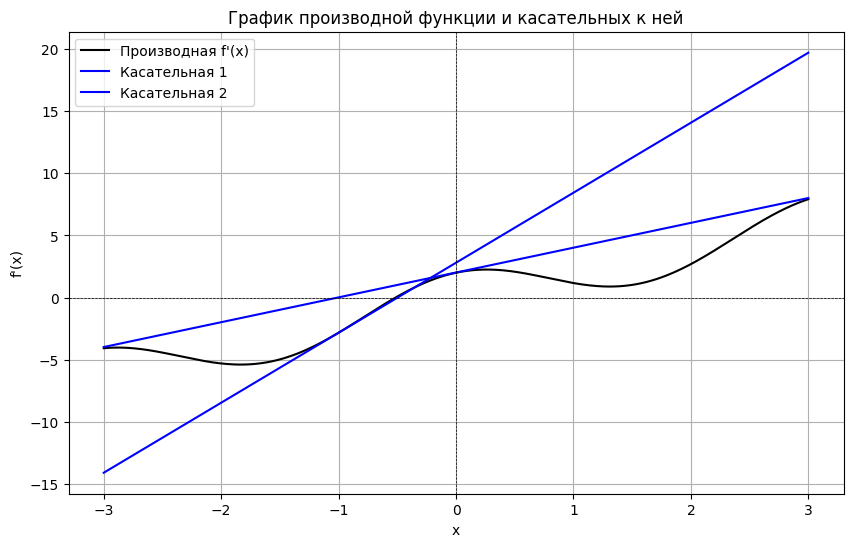

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**4 + x**2 + np.sin(2*x)

def numerical_derivative(func, x, h=1e-5):
    return (func(x + h) - func(x - h)) / (2 * h)

def numerical_second_derivative(func, x, h=1e-5):
    return (numerical_derivative(func, x + h) - numerical_derivative(func, x - h)) / (2 * h)

def newton_method(func, x0, tol=1e-6, max_iter=1000):
    x_vals = [x0]  # Сохраняем все значения x для касательных

    for iteration in range(max_iter):
       
        f1 = numerical_derivative(func, x0)
        f2 = numerical_second_derivative(func, x0)

   
        if f2 == 0:
            raise ValueError("Вторая производная равна нулю, метод не может быть применен.")

        x1 = x0 - f1 / f2
        x_vals.append(x1)

        if abs(x1 - x0) < tol:
            return x1, x_vals
        
        x0 = x1


def plot_graph(func, x_vals, interval):
    a,b = interval
    x = np.linspace(a, b, 400)
    y_prime = numerical_derivative(func, x)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y_prime, label='Производная f\'(x)', color='black')

    # Построение касательных к производной для двух итераций
    for i in range(min(2, len(x_vals) - 1)):
        x0 = x_vals[i]
        
        slope = numerical_second_derivative(func, x0)  

        
        tangent_line = slope * (x - x0) + y_prime[np.argmin(np.abs(x - x0))]  #
        plt.plot(x, tangent_line, label=f'Касательная {i + 1}', color='blue')

    plt.title('График производной функции и касательных к ней')
    plt.xlabel('x')
    plt.ylabel('f\'(x)')
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.legend()
    plt.grid()
    plt.show()

interval = [-3,3]
x0 = (interval[0] + interval[1]) / 2  
minimum, x_vals = newton_method(func5, x0)
print(f"Минимум функции в интервале {interval}: {minimum}, {x_vals}")

plot_graph(func5, x_vals, interval)